### **วิเคราะห์อนุกรมเวลา โดยใช้ LightGBM regressor [LINK](https://lightgbm.readthedocs.io/en/stable/)**

### **1.Import Libary**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score #mean_squared_error (ค่าเฉลี่ยกำลัง2ของคลาดเคลื่อน:MSE)

In [59]:
!pip install lightgbm

### **2. Load dataset (คุณภาพอากาศ pm2.5)**

In [60]:
url = "https://raw.githubusercontent.com/prasertcbs/basic-dataset/refs/heads/master/bangkok-air-quality.csv"
df = pd.read_csv(url)
df.head()

,date,pm25,pm10,o3,no2,so2,co
0,2021/3/1,93,30,8,6,1,
1,2021/3/2,68,27,7,5,1,
2,2021/3/3,58,37,13,9,1,
3,2021/3/4,74,35,13,6,,
4,2021/3/5,72,38,15,6,1,


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2624 non-null   object
 1    pm25   2624 non-null   object
 2    pm10   2624 non-null   object
 3    o3     2624 non-null   object
 4    no2    2624 non-null   object
 5    so2    2624 non-null   object
 6    co     2624 non-null   object
dtypes: object(7)
memory usage: 143.6+ KB


### **3. แปลงคอลัมภ์ date เป็น datatime type**

In [62]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2624 non-null   datetime64[ns]
 1    pm25   2624 non-null   object        
 2    pm10   2624 non-null   object        
 3    o3     2624 non-null   object        
 4    no2    2624 non-null   object        
 5    so2    2624 non-null   object        
 6    co     2624 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 143.6+ KB


### **4. ตั้ง column date เป็น index**

In [63]:
df = df.set_index('date')
df.head()

,pm25,pm10,o3,no2,so2,co
date,,,,,,
2021-03-01,93,30,8,6,1,
2021-03-02,68,27,7,5,1,
2021-03-03,58,37,13,9,1,
2021-03-04,74,35,13,6,,
2021-03-05,72,38,15,6,1,


### **5. plot กราฟค่า PM2.5**

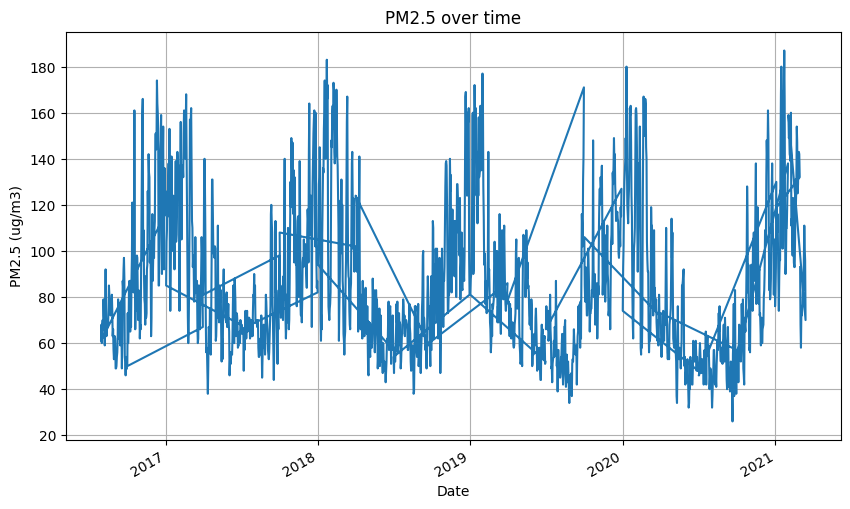

In [65]:
df[' pm25'] = pd.to_numeric(df[' pm25'],errors='coerce')
df[' pm25'].plot(figsize=(10,6))
plt.title('PM2.5 over time')
plt.xlabel('Date')
plt.ylabel('PM2.5 (ug/m3)')
plt.grid(True)
plt.show()

### **6. สร้างฟีเจอร์จาก Data index**

In [76]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek  #index[0] = Monday, index[6] = Sunday
df['dayofmonth'] = df.index.day
df['dayofyear'] = df.index.dayofyear
df['weekofyear'] = df.index.isocalendar().week
df['quarter'] = df.index.quarter
df.head()

,pm25,pm10,o3,no2,so2,co,year,month,dayofweek,dayofyear,quarter,day,dayofmonth,weekofyear
date,,,,,,,,,,,,,,
2021-03-01,93.0,30,8,6,1,,2021,3,0,60,1,1,1,9
2021-03-02,68.0,27,7,5,1,,2021,3,1,61,1,2,2,9
2021-03-03,58.0,37,13,9,1,,2021,3,2,62,1,3,3,9
2021-03-04,74.0,35,13,6,,,2021,3,3,63,1,4,4,9
2021-03-05,72.0,38,15,6,1,,2021,3,4,64,1,5,5,9


In [78]:
#ตรวจสอบค่าว่าง
print(df.isnull().sum())
#ลบMissing value
df.dropna(inplace=True)
df.isnull().sum()

 pm25         944
 pm10           0
 o3             0
 no2            0
 so2            0
 co             0
year            0
month           0
dayofweek       0
dayofyear       0
quarter         0
day             0
dayofmonth      0
weekofyear      0
dtype: int64


,0
pm25,0
pm10,0
o3,0
no2,0
so2,0
co,0
year,0
month,0
dayofweek,0
dayofyear,0


### **7. กำหนดตัวแปรอิสระ (x) และตัวแปรตาม (y)**

In [82]:
x=df[['year','month','day','dayofweek','dayofyear','weekofyear','quarter']]
y=df[' pm25']

### **8. การแบ่งข้อมูล train และ test**

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=7)
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (1344, 7)
x_test shape: (336, 7)
y_train shape: (1344,)
y_test shape: (336,)


### **9. สร้างและฝึกโมเดล LightGBM regressor**

In [86]:
lgb_reg = lgb.LGBMRegressor(random_state=7)
lgb_reg.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 1344, number of used features: 7
[LightGBM] [Info] Start training from score 85.605655


LGBMRegressor(random_state=7)

### **10. ทำนายค่า PM2.5 บน Training set**

In [87]:
y_pred_train = lgb_reg.predict(x_train)
print(y_pred_train)

[114.17045869  80.19469079  64.89234612 ...  66.68160999  95.10577183
  54.10997707]


In [91]:
print(f'Train MSE: {mean_squared_error(y_train,y_pred_train):,.2f}')
print(f'Train R2: {r2_score(y_train,y_pred_train):,.2f}')
#MSE ยิ่งน้อยยิ่งดี / R2 score 0-1 ยิ่งใกล้ 1 ยิ่งดี

Train MSE: 163.47
Train R2: 0.84


### **11. ทำนายค่า PM2.5 บน Testing set**

In [96]:
y_pred_test = lgb_reg.predict(x_test)
print(y_pred_test)

[ 60.43679833 106.38196256  89.16407954 109.76962995  49.01675131
  50.39238513 114.8953785   58.90563218 118.601336    68.73717426
  63.30328167  98.46242719 105.31302063  53.36220039 101.12886881
  52.75612727  77.38424466 109.19969749 105.79087449  65.80199098
 109.09730511 101.77654327  69.1357771   74.0885329  135.65155952
  90.66646635  72.54628745  88.93930614 112.10761205  90.27280031
  79.93717582  45.46780963  80.1108793   91.844879    71.29750081
  77.95136782 104.20486142  83.58028494 124.11073708  62.09675329
 153.16541481  84.9737664  152.18137078  59.36966574  91.50673885
  93.32385663  95.98763831  79.31946069 110.52480058  91.92939113
  65.1339814   45.27090844  62.9206359   89.26333167 144.91625222
 134.78978082  50.90000793 118.79230843 124.91241576 130.52209938
  59.04805098 101.59798416 116.80952223  71.53510694 111.13123879
  75.22699655  74.01683757  81.8517586   60.50300221  79.40455255
  76.17579412  68.28989364  82.96880632  57.52251754  57.48974735
 148.64046

In [97]:
print(f'Test MSE: {mean_squared_error(y_test,y_pred_test):,.2f}')
print(f'Test R2: {r2_score(y_test,y_pred_test):,.2f}')
#MSE High R2 Low Model ไม่ดีพอ อาจจะ Overfitting

Test MSE: 385.74
Test R2: 0.63


### **12. สร้าง data frame ของค่าจริงและค่าทำนาย จากนั้น plot เปรียบเทียบค่าจริงกับค่าทำนายบน Test set**

In [98]:
df_test_pred = pd.DataFrame({'y_test':y_test,'y_pred':y_pred_test})
df_test_pred.head()

,y_test,y_pred
date,,
2018-06-29,72.0,60.436798
2020-01-30,110.0,106.381963
2017-10-21,110.0,89.164080
2017-04-01,81.0,109.769630
2020-06-11,54.0,49.016751


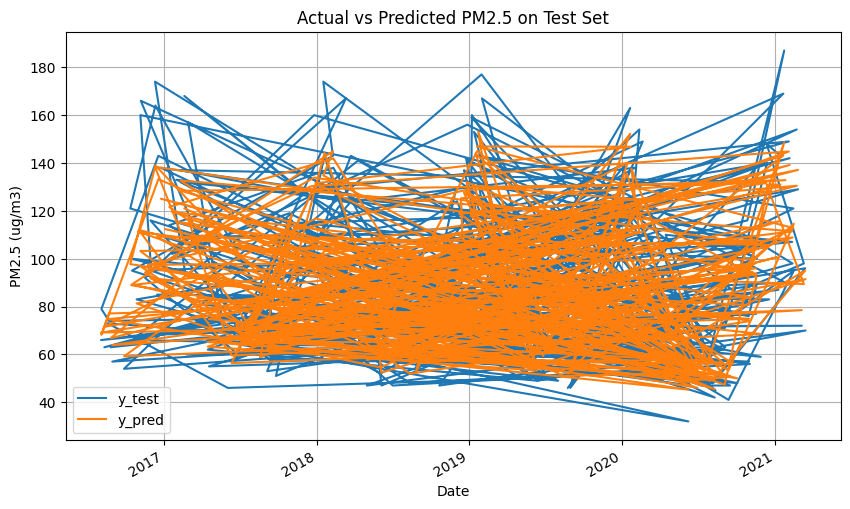

In [99]:
df_test_pred.plot(figsize=(10,6))
plt.title('Actual vs Predicted PM2.5 on Test Set')
plt.xlabel('Date')
plt.ylabel('PM2.5 (ug/m3)')
plt.grid(True)
plt.show()